# Laboratorio 3 - Sistemas Operativos

- **Laura Vanessa Tascón Cataño**
- **Daniel Tabares Pavas**
- **Juan Sebastián Muñoz Aranda**

El proyecto es la adaptación de un algoritmo que resuelve la función SAXPY
$$
\mathbf{\vec{Y}} = a*\mathbf{\vec{X}} + \mathbf{\vec{Y}}
$$

El objetivo era mejorar el algoritmo para lograr una implementación usando hilos, y por lo tanto, concurrencia y paralelismo, con el fin de ejecutar las operaciones de una manera más veloz.

Se utilizó un computador personal común para ejecutar el programa, el cuál tenía las siguientes características:


*   Ref: MSI CX62-6QD
*   CPU: Intel i7-6700HQ (8 cores) @ 3.500GHz
*   RAM: 16Gb ddr4
*   OS: Kubuntu 22.04.4 LTS x86_64

Se realizaron pruebas para 1, 2, 4, 8 y 16 hilos, para cada caso se tomaron 10 mediciones de tiempo y los valores se consolidaron en un archivo con formato CSV que contiene únicamente el # de hilos utilizados y el tiempo de ejecución.
a continuación se muestran los resultados y el proceso de manejo de los datos

In [ ]:
#Importamos Librerías útiles para manejo de datos, estadísticas y gráficas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#importamos el archivo con los datos recolectados
data = pd.read_csv('saxpy.csv')

In [ ]:
#Mostramos un resumen (descripción) de los datos encontrados
descripcion = data.groupby('n_threads')['exec_time'].describe()
print(descripcion)

           count     mean        std     min       25%      50%       75%  \
n_threads                                                                   
1           10.0  89.4826   2.516406  88.480  88.51950  88.6960  88.78775   
2           10.0  60.0279  10.622243  53.085  54.29000  57.3175  57.97100   
4           10.0  40.1560   3.164846  36.240  37.69250  39.7005  41.93825   
8           10.0  31.1870   1.018976  29.167  30.72825  31.5170  31.96225   
16          10.0  29.3436   0.732997  28.470  28.75900  29.1725  29.89225   

              max  
n_threads          
1          96.619  
2          88.476  
4          46.627  
8          32.271  
16         30.473  


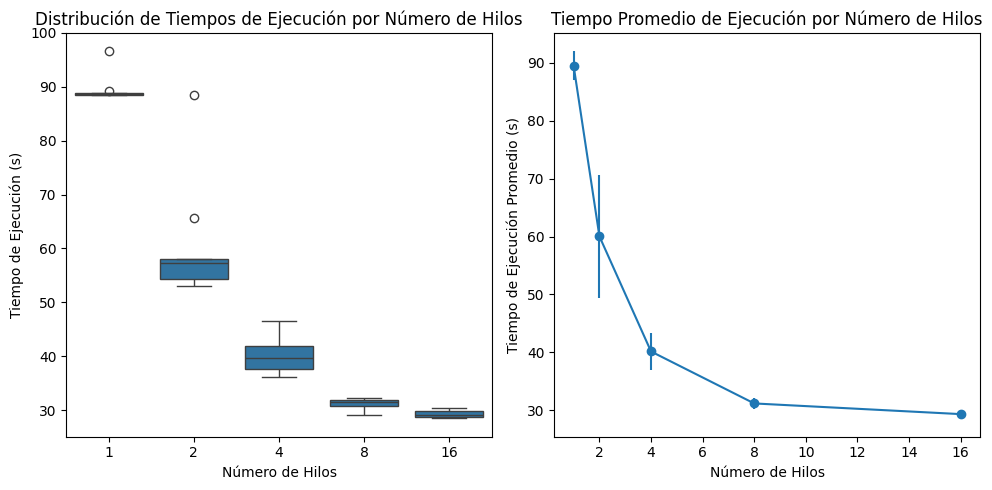

In [ ]:
#Graficamos la distribución de los datos en un boxplot y las medias de tiempo de ejecución para cada número de hilos

plt.figure(figsize=(10, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='n_threads', y='exec_time', data=data)
plt.title('Distribución de Tiempos de Ejecución por Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Tiempo de Ejecución (s)')

# Gráfica de Línea
plt.subplot(1, 2, 2)
mean_times = data.groupby('n_threads')['exec_time'].mean().reset_index()
std_times = data.groupby('n_threads')['exec_time'].std().reset_index()
plt.errorbar(mean_times['n_threads'], mean_times['exec_time'], yerr=std_times['exec_time'], fmt='-o')
plt.title('Tiempo Promedio de Ejecución por Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Tiempo de Ejecución Promedio (s)')

plt.tight_layout()
plt.show()

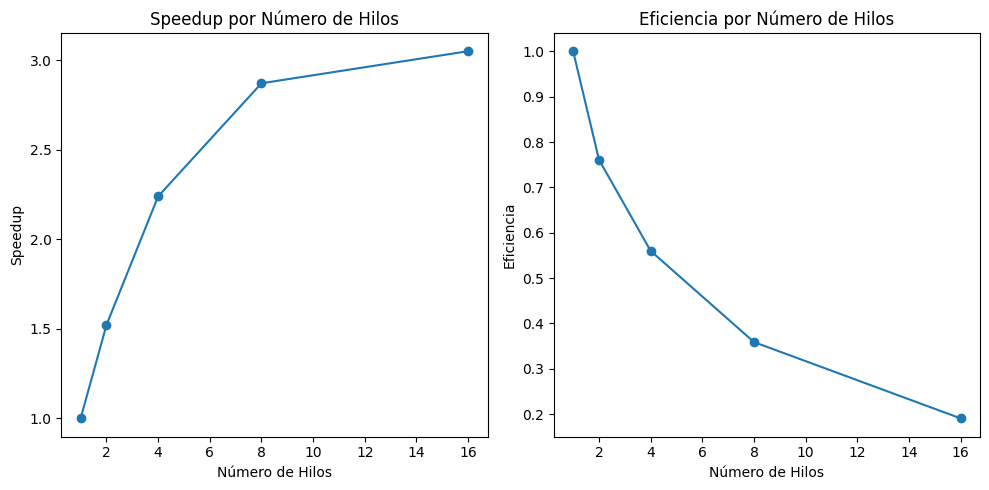

In [ ]:
# Calcular Speedup
t1 = data[data['n_threads'] == 1]['exec_time'].mean()
data['speedup'] = t1 / data['exec_time']

# Calcular Eficiencia
data['eficiencia'] = data['speedup'] / data['n_threads']

# Graficar Speedup y Eficiencia
plt.figure(figsize=(10, 5))

# Speedup
plt.subplot(1, 2, 1)
mean_speedup = data.groupby('n_threads')['speedup'].mean().reset_index()
plt.plot(mean_speedup['n_threads'], mean_speedup['speedup'], '-o')
plt.title('Speedup por Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Speedup')

# Eficiencia
plt.subplot(1, 2, 2)
mean_efficiency = data.groupby('n_threads')['eficiencia'].mean().reset_index()
plt.plot(mean_efficiency['n_threads'], mean_efficiency['eficiencia'], '-o')
plt.title('Eficiencia por Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Eficiencia')

plt.tight_layout()
plt.show()

In [ ]:
#Mediana de tiempo de ejecución según número de hilos
median_times = data.groupby('n_threads')['exec_time'].median().reset_index()
print(median_times)

   n_threads  exec_time
0          1    88.6960
1          2    57.3175
2          4    39.7005
3          8    31.5170
4         16    29.1725


In [ ]:
#Medición de la dispersión usando Intervalo Intercuartílico (IQR)
iqr_times = data.groupby('n_threads')['exec_time'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25)).reset_index()
print(iqr_times)

   n_threads  exec_time
0          1    0.26825
1          2    3.68100
2          4    4.24575
3          8    1.23400
4         16    1.13325


In [ ]:
#Coeficiente de variación
cv_times = (data.groupby('n_threads')['exec_time'].std() / data.groupby('n_threads')['exec_time'].mean()).reset_index()
cv_times.columns = ['n_threads', 'cv']
print(cv_times)

   n_threads        cv
0          1  0.028122
1          2  0.176955
2          4  0.078814
3          8  0.032673
4         16  0.024980


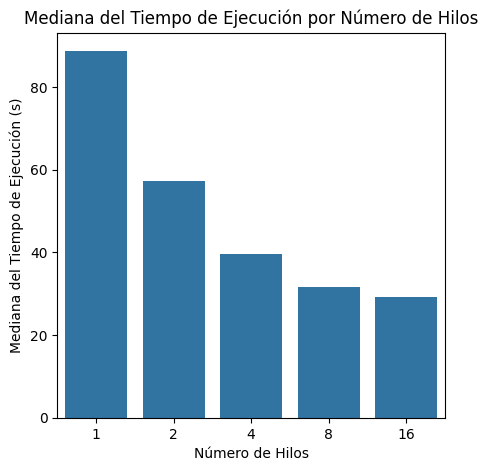

In [ ]:
# Gráfica de Barras para la Mediana del Tiempo de Ejecución
plt.figure(figsize=(5, 5))
sns.barplot(x='n_threads', y='exec_time', data=median_times)
plt.title('Mediana del Tiempo de Ejecución por Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Mediana del Tiempo de Ejecución (s)')
plt.show()

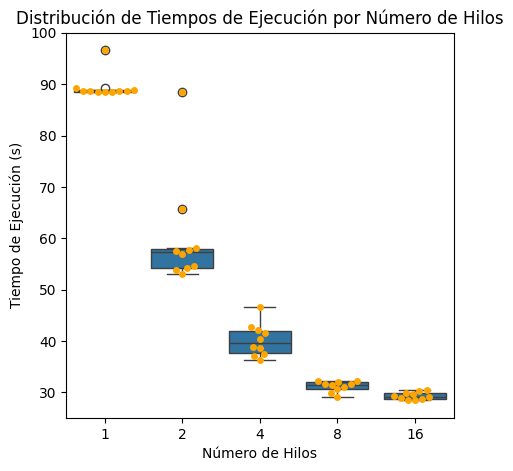

In [ ]:
# Boxplot con Swarmplot para la distribución de los datos
plt.figure(figsize=(5, 5))
sns.boxplot(x='n_threads', y='exec_time', data=data)
sns.swarmplot(x='n_threads', y='exec_time', data=data, color='orange')
plt.title('Distribución de Tiempos de Ejecución por Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Tiempo de Ejecución (s)')
plt.show()